In [139]:
import pandas as pd
import numpy as np
from tensorflow import keras
import glob as gb
import os
import tensorflow as tf

In [86]:
train_dir = './eINTERFACE_2021_Image/train/'
test_dir = './eINTERFACE_2021_Image/test/'
BatchSize = 64

In [87]:
for folder in os.listdir(train_dir):
    files = gb.glob(pathname=str(train_dir + "/"+folder+"/*.jpg"))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 1896 in folder Anger
For training data, found 1891 in folder Disgust
For training data, found 1922 in folder Fear
For training data, found 1922 in folder Happiness
For training data, found 1922 in folder Sadness
For training data, found 1922 in folder Surprise


In [88]:
for folder in os.listdir(test_dir):
    files = gb.glob(pathname=str(test_dir + "/"+folder+"/*.jpg"))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 237 in folder Anger
For training data, found 237 in folder Disgust
For training data, found 241 in folder Fear
For training data, found 241 in folder Happiness
For training data, found 241 in folder Sadness
For training data, found 241 in folder Surprise


### Lets see some random images with labels

In [89]:
import random
import matplotlib.pyplot as plt

In [90]:
def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    
    random_image = random.sample(os.listdir(target_folder),1)
    
    img = plt.imread(target_folder + "/"+random_image[0])
    plt.imshow(img)
    plt.axis('off')
    print(f"Image Shape {img.shape}")
    
    return img

Image Shape (416, 416, 3)


array([[[  2,   2,   2],
        [  1,   1,   1],
        [  7,   7,   7],
        ...,
        [ 10,  10,  10],
        [  0,   0,   0],
        [ 14,  14,  14]],

       [[ 13,  13,  13],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  6,   6,   6],
        [  8,   8,   8],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  4,   4,   4],
        ...,
        [  8,   8,   8],
        [  0,   0,   0],
        [255, 255, 255]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  3,   3,   3],
        [ 16,  16,  16]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 20,  20,  20],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  9,   9,   9],
        [  0,   0,   0]]

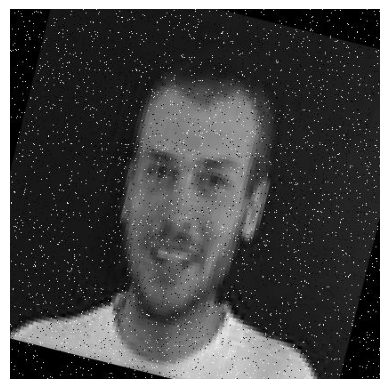

In [91]:
view_random_image('../Happy_sad_prediction/eINTERFACE_2021_Image/train/','Happiness')

### Classes present in datasets 

In [92]:
class_names = ['Anger','Disgust','Fear','Happiness','Sadness','Surprise']

Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)


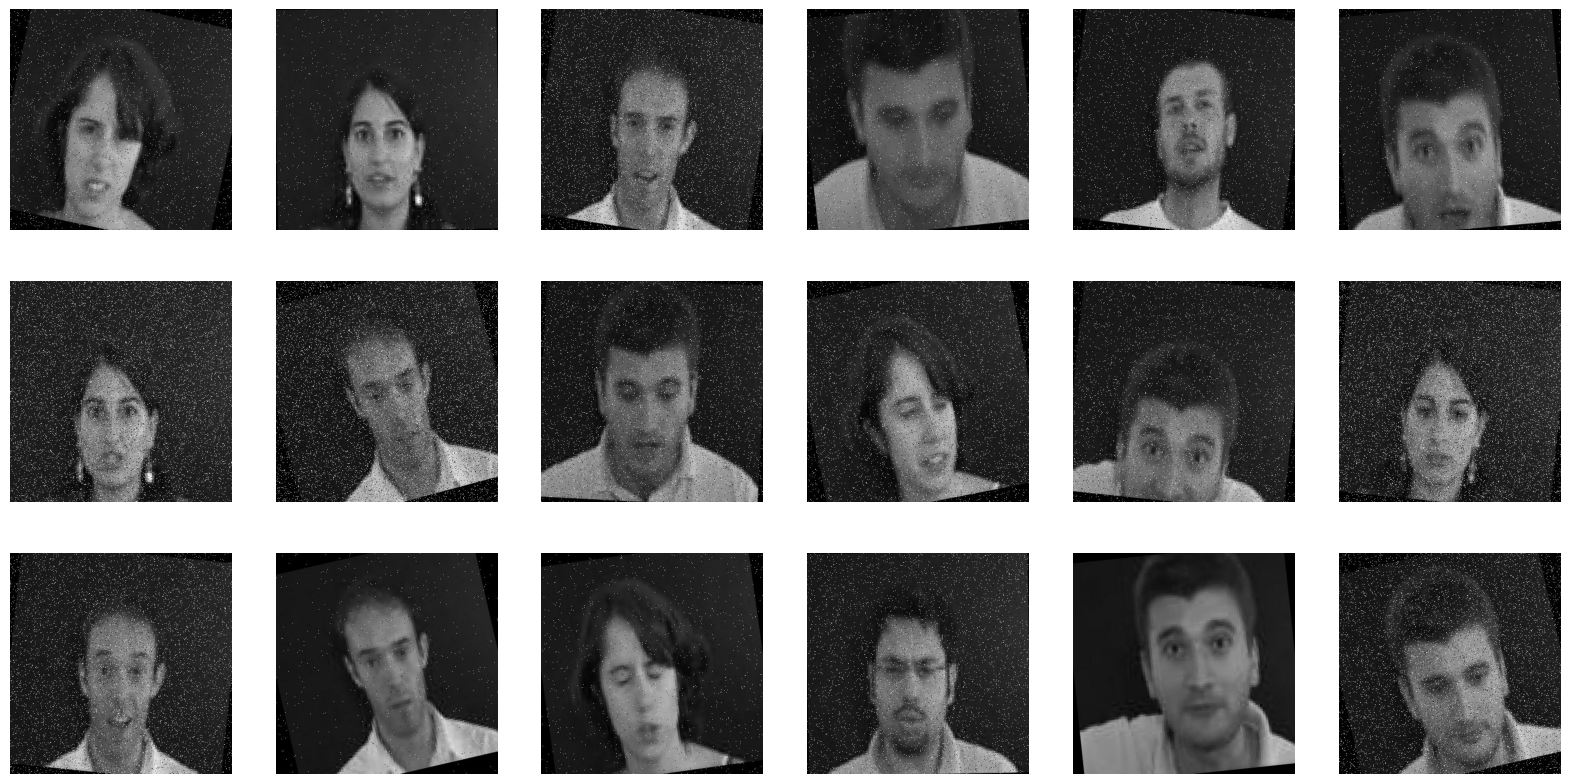

In [93]:
plt.figure(figsize=(20,10))
for i in range(18):
    plt.subplot(3,6,i+1)
    class_name  = random.choice(class_names)
    img = view_random_image(target_dir='./eINTERFACE_2021_Image/train/', target_class=class_name)

### Preparing data for training 

In [94]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [95]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  zoom_range=0.2,
                                  shear_range=0.2,
                                  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [96]:
training_set = train_datagen.flow_from_directory(train_dir, target_size=(128,128),batch_size=BatchSize , class_mode='categorical')
test_set = test_datagen.flow_from_directory(test_dir,target_size=(128,128),batch_size=BatchSize, class_mode='categorical')

Found 11475 images belonging to 6 classes.
Found 1438 images belonging to 6 classes.


### Model Building (CNN)

In [98]:
model = keras.Sequential([
    keras.layers.Conv2D(16, (3,3), input_shape = (128,128,3), activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(6, activation='softmax')
])

In [99]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

### Summary of the model

In [100]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3686528   
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

### Model Evaluate

In [148]:
preds = model.evaluate(test_set)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

23/23 [==============================] - 2s 88ms/step - loss: 0.2558 - accuracy: 0.9110

Loss = 0.2558208107948303
Test Accuracy = 0.9109874963760376


### Testing the model

'Happiness'

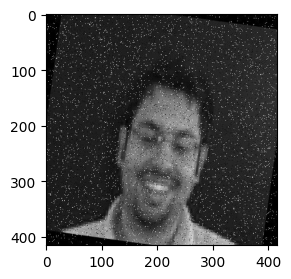

In [129]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

image = cv2.imread("./eINTERFACE_2021_Image/val/Happiness/myvideo_frames0_jpg.rf.0e08f294f6698842935cd81c2ae3b81b.jpg")
plt.figure(figsize=(3,3))
plt.imshow(image)

image_fromarray = Image.fromarray(image)
resize_image = image_fromarray.resize((128, 128))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = model.predict(input_data)
result = class_names[pred.argmax()]
result